### Importing Packages

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imageio import imread

sns.set_theme(style="darkgrid")

# path to dataset
IMG_DIR = 'shipsnet'

### Loading Images
- Class 1 is the True class - images of ships that are centered in the satellite image
- Class 2 is the False class - images of random land cover that do not include ships or partially include ships

In [38]:
class1 = []
class0 = []
for file in os.listdir(dir):
    loaded_img = imread(os.path.join(IMG_DIR, file))
    if file[0] == '0':
        class0.append(loaded_img)
    else:
        class1.append(loaded_img)
class1 = np.array(class1)
class0 = np.array(class0)

print(f"Class 1 shape: {class1.shape}")
print(f"Class 0 shape: {class0.shape}")

/var/folders/z2/k1ddzt7d0q32_935myb4fz300000gn/T/ipykernel_94705/3240290233.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  loaded_img = imread(os.path.join(IMG_DIR, file))


Class 1 shape: (1000, 80, 80, 3)
Class 0 shape: (3000, 80, 80, 3)


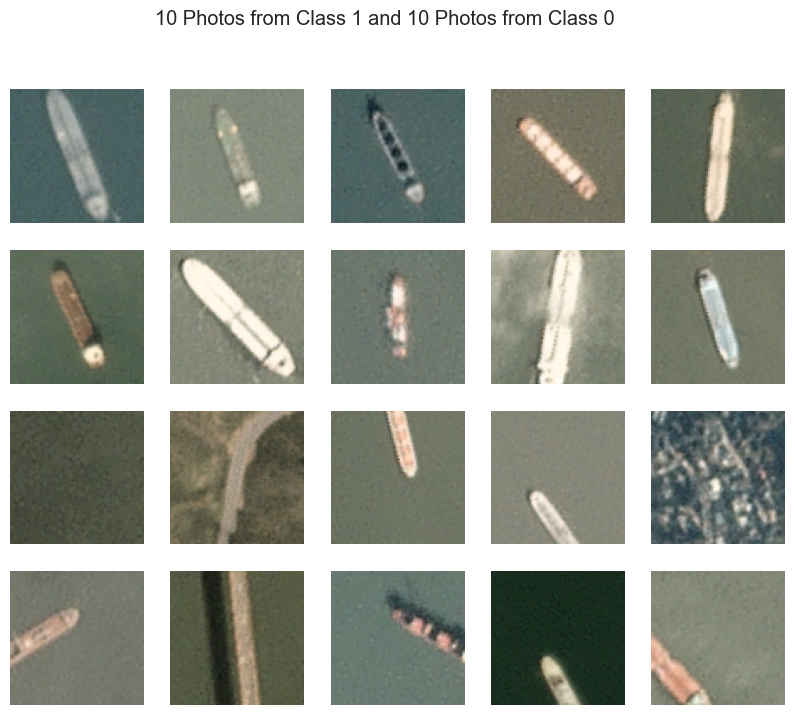

In [46]:
# TODO: clean up plot
np.random.seed = 888

fig, axs = plt.subplots(4, 5, figsize=(10, 8))
class1_sample = np.random.choice(range(len(class1)), 10, replace=False)
class0_sample = np.random.choice(range(len(class0)), 10, replace=False)

for idx, img in enumerate(class1[class1_sample]):
    axs[idx % 2][idx % 5].imshow(img)
    axs[idx % 2][idx % 5].axis('off')
    
for idx, img in enumerate(class0[class0_sample]):
    axs[idx % 2 + 2][idx % 5].imshow(img)
    axs[idx % 2 + 2][idx % 5].axis('off')
plt.suptitle("10 Photos from Class 1 and 10 Photos from Class 0")
plt.show()

### General Thoughts
- Since orientation of ships varies significantly, a model that detects edges (CNNs) is likely to be a lot more performant than, e.g. logistic regression
- Noise in images - may benefit from some kind of noise reduction technique as a part of the model prediction pipeline?
    - Median filter (also called median blur) may be helpful @ noise reduction
        - need to determine window size
    - How would we implement?
        - Need to create a wrapper if we wanted to apply it @ inference for sklearn?
        - Can add as layer in TF model
- Images appear to be at differing contrasts, potentially due to cloud cover, time of day, air pollution, etc. 
    - Image augmentation that varies brightness and contrast will probably be really helpful
    - Would varying saturation help?
- Images feature ships in different orientations
    - Image augmentation that reorients images (random rotate? tf.image.rot90?) will probably be helpful
- Other geometric image augmentation techniques like shearing, rotating, cropping, etc. don't seem applicable since our True class is photos where the ship is centered (e.g. if we crop an image w/ class 1, we'd end up with a ship that's no longer centered and may be cut off which should actually be interpreted as class 0)